In [2]:
import pandas as pd
import numpy as np

In [3]:
training_data = pd.read_csv('Training.csv', delimiter=';', decimal=',')
target_class = 'classlabel'

# Analysis and Feature Engineering

In [4]:
from data import *

In [5]:
# How many missing values?
training_data.isnull().sum()

v33             66
v76              0
v12             39
v68              0
v50              0
v7              39
v70              0
v55            100
v20              0
v24              0
v32             64
v97              0
v28              0
v99             66
v95           2145
v42            100
v53              0
v85             64
v9               0
v84              0
v44              0
classlabel       0
dtype: int64

v33 ['v' 'ff' 'o' 'h' 'j' 'bb' 'n' 'z' nan 'dd']
v76 ['g' 's' 'p']
v68 ['f' 't']
v7 ['a' 'b' nan]
v70 ['t' 'f']
v32 ['u' 'y' nan 'l']
v28 ['t' 'f']
v99 ['c' 'k' 'ff' 'i' 'j' 'q' 'W' 'd' 'm' 'cc' 'aa' 'r' 'x' 'e' nan]
v95 ['t' nan 'f']
v85 ['g' 'p' nan 'gg']
v84 ['f' 't']
v44 ['f' 't']
classlabel ['no.' 'yes.']


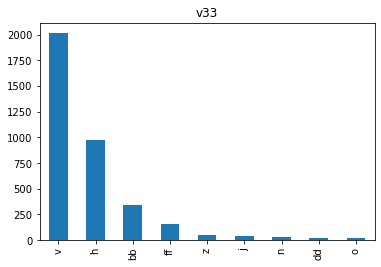

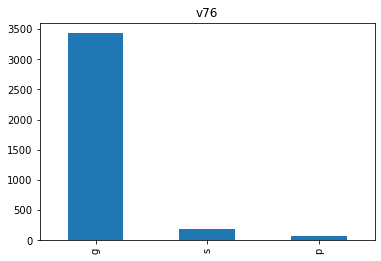

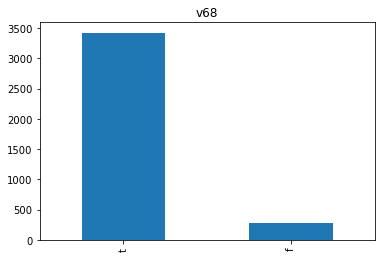

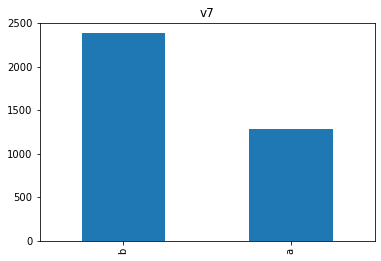

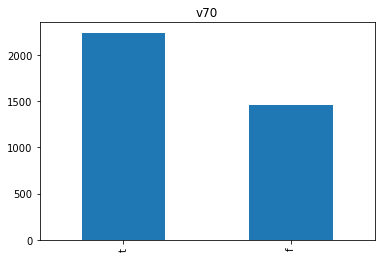

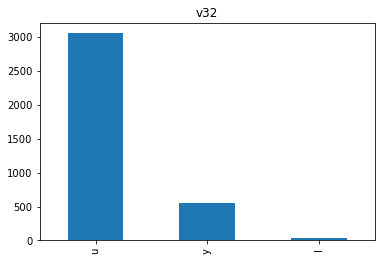

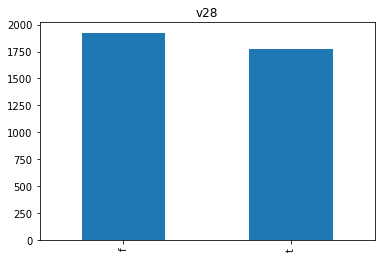

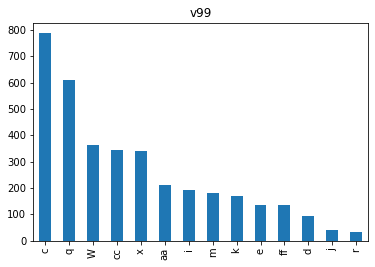

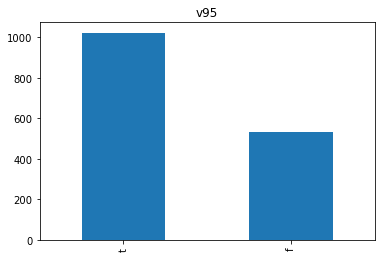

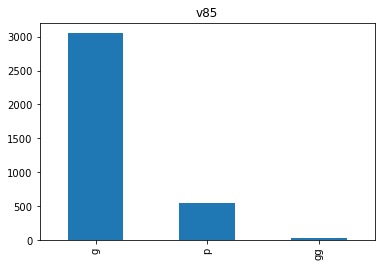

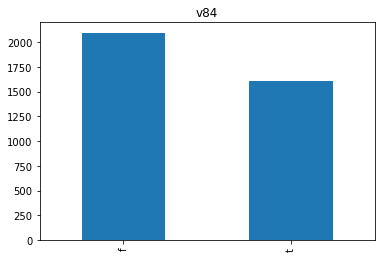

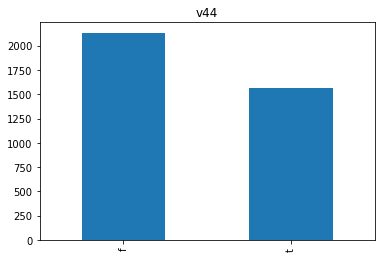

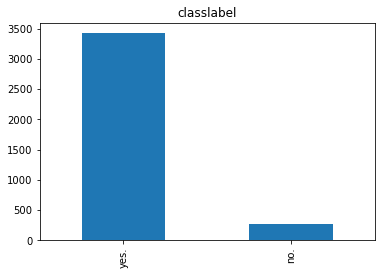

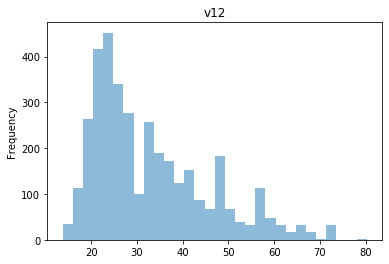

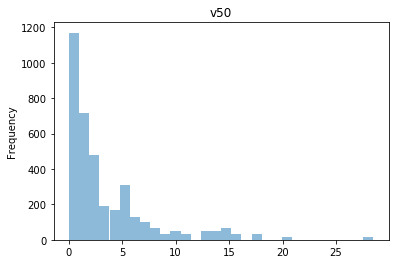

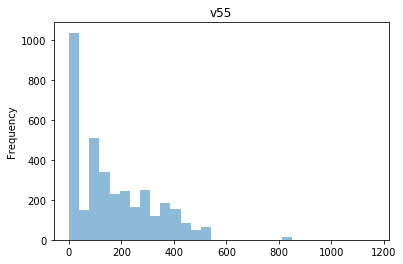

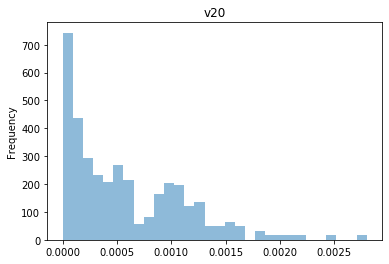

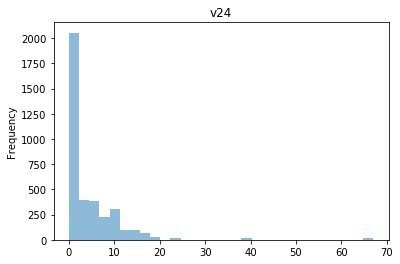

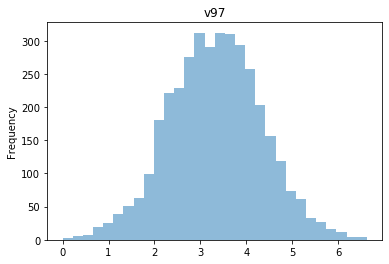

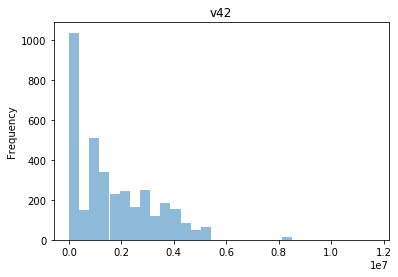

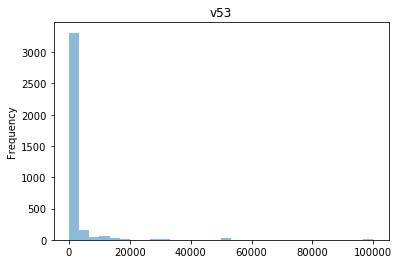

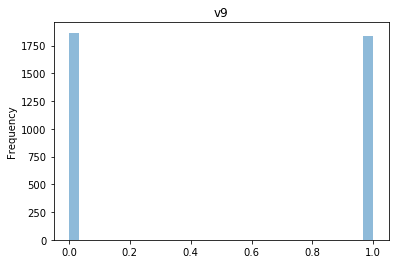

In [6]:
#Plot names of unique values of categorical variables
#Plot histogram of features to look at their distributions
describe_data(training_data = training_data)

## Missing values

In [7]:
# Add nan as a new class
# It will be done in the features where the value nan appears a lot of times, v95 (2145) and where
# there are comparable values of nan as other clases (v99,v33,v32,v85). In the latter, I consider 
# that as other classes have also small amount of values, the nan values might be considered in 
# the same way (as another class). 

training_data = create_nan_class(df = training_data, columns = ['v95','v99','v32','v33','v85'])

In [8]:
#visualize the new missing values
training_data.isnull().sum()

v33             0
v76             0
v12            39
v68             0
v50             0
v7             39
v70             0
v55           100
v20             0
v24             0
v32             0
v97             0
v28             0
v99             0
v95             0
v42           100
v53             0
v85             0
v9              0
v84             0
v44             0
classlabel      0
dtype: int64

## Categorical to numerical features. 
### To have more features to predict the missing values

In [9]:
#Convert all variables that have only 2 categories.
#Also convert v95 since the data is very balanced and the 3 features alone might have an influence.
#As v7 has missing values we will first transform the other features to predict the missing values
#we will compute the numerical features of v7 afterwards
#columns = ['v68','v70','v7','v28','v28','v84','v44','v95']

training_data = bincat2num(df = training_data, columns = ['v68','v70','v28','v84','v44',target_class])
training_data = multicat2num(df = training_data, columns = ['v95'])

In [10]:
#To identify if 1 is yes or no
target_class = 'classlabel_yes.'

## Predict rest of missing values

In [11]:
#Features with still missing values:
features_predict = ['v12','v7','v55','v42']
#Predict with the data that have no missing values:
features_train = ['v68_t','v50','v70_t','v20','v24','v97','v28_t','v53','v9','v44_t','v95_f','v95_nan','v95_t']

df_train = train_missing_values(df = training_data,features_predict = features_predict,features_train = features_train)

Computing feature v12
Computing feature v7
[22:29:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/guillermogarcia/anaconda3/envs/Guille/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Computing feature v55
Computing feature v42
Done!


In [12]:
#visualize the new missing values
df_train.isnull().sum()

v33                0
v76                0
v12                0
v50                0
v7                 0
v55                0
v20                0
v24                0
v32                0
v97                0
v99                0
v42                0
v53                0
v85                0
v9                 0
v68_t              0
v70_t              0
v28_t              0
v84_t              0
v44_t              0
classlabel_yes.    0
v95_f              0
v95_nan            0
v95_t              0
dtype: int64

### v85 and v32 same feature!

In [13]:
##### It looks that v32 and v85 are the same -> Check it
## compute the dummies and compute the hamming distance
## If the hamming distance between variables in the dummy features is 0 it means that they are the same feature
df_tmp_32_85 = multicat2num(df = df_train,columns = ['v85','v32'])
df_tmp_32_85 = df_tmp_32_85[['v85_g','v85_gg','v85_nan','v85_p','v32_l','v32_nan','v32_y','v32_u']]

print(df_tmp_32_85.corr(method=hamming_dist))

'''
v85_gg ==v32_l
v85_g == v32_u
v85_nan == v32_nan
v85_p == v32_y
IT IS THE SAME VARIABLE WITH DIFFERENT NAMES OF CATEGORICAL FEATURES --> I drop one because having both doesn't
add additional information.

I will drop v32

'''
df_train = df_train.drop(columns = ['v32'])

          v85_g  v85_gg  v85_nan   v85_p   v32_l  v32_nan   v32_y   v32_u
v85_g       1.0  3087.0   3119.0  3604.0  3087.0   3119.0  3604.0     0.0
v85_gg   3087.0     1.0     96.0   581.0     0.0     96.0   581.0  3087.0
v85_nan  3119.0    96.0      1.0   613.0    96.0      0.0   613.0  3119.0
v85_p    3604.0   581.0    613.0     1.0   581.0    613.0     0.0  3604.0
v32_l    3087.0     0.0     96.0   581.0     1.0     96.0   581.0  3087.0
v32_nan  3119.0    96.0      0.0   613.0    96.0      1.0   613.0  3119.0
v32_y    3604.0   581.0    613.0     0.0   581.0    613.0     1.0  3604.0
v32_u       0.0  3087.0   3119.0  3604.0  3087.0   3119.0  3604.0     1.0


## Categorical to numerical features

In [14]:
### Categorical to numerical in the ones that had missing values
df_train = bincat2num(df_train,columns = ['v7'])

### v85

In [15]:
# In order to encode numerial features from categorical better, we look
# at the distribution of labels in each category. We will leave the 
# features that contain no additional information to our prior (the 
# mean distribution of target labels )

target_count_per_feature(df_train = df_train, feature = 'v85')

# We can observe that there are 2 categorical classes i.e nan, gg which only have as target feature 
# the type 1 ('yes'), so knowing those features in a one-hot encoding would give us the information that in this 
# examples where the classes (nan, gg) appear the category might be 1 ('yes'). However the number of examples in 
# this variables is not big enough in order to have confidence about this fact.
# In this exercise is however very important to detect the 'no' category since is very unbalanced and there are not
# a lot of examples. If the targets were different the feature engineering process would be different.
# I decide then not to include them as feature in order to regularize the model to allow to better generalization
# and avoid curse of dimensionality.
# (NOTE: If we had information about the feature we could take this decision much better)
# The feature v85 will consist in a binary feature, either it is p or not. If it is not, we will consider it is g.

Percentage total of label 0: 7.45945945945946
----------------------
Percentage of label 0 in category:  6.252045826513912
Desviation from mean of dataset: -1.2074136329455474
Counts target labels of  g ---> 1    2864
0     191
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  15.482695810564662
Desviation from mean of dataset: 8.023236351105203
Counts target labels of  p ---> 1    464
0     85
Name: classlabel_yes., dtype: int64
----------------------
Counts target labels of  nan ---> 1    64
Name: classlabel_yes., dtype: int64
----------------------
Counts target labels of  gg ---> 1    32
Name: classlabel_yes., dtype: int64


In [16]:
df_train = df_train.drop(columns = ['v85'])
df_train['v85_p'] = df_tmp_32_85['v85_p']

### v33 and v99

In [17]:
# By knowing how much the percentage of the target labels in each class deviates from the mean of all classes
# we can know how much information can be infered from each variable if we would consider each class
# of the categorical feature alone. For example a category class with a high positive deviation in the percentage 
# would tell us that by knowing that feature is easy to recognize the 'no' label. Conversely, if the percentage of
# the class category is similar to the mean, that class catetgory doesn't add much information statistically
# speaking.
# Again, by knowing the meaning of the feature the numerical encoding could be done in a much better way.

In [18]:
df_train['v33'].value_counts()

v      2015
h       970
bb      339
ff      154
nan      66
z        49
j        37
n        33
dd       20
o        17
Name: v33, dtype: int64

In [19]:
target_count_per_feature(df_train = df_train, feature = 'v33')

Percentage total of label 0: 7.45945945945946
----------------------
Percentage of label 0 in category:  7.890818858560794
Desviation from mean of dataset: 0.4313593991013347
Counts target labels of  v ---> 1    1856
0     159
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  27.27272727272727
Desviation from mean of dataset: 19.81326781326781
Counts target labels of  ff ---> 1    112
0     42
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  5.88235294117647
Desviation from mean of dataset: -1.5771065182829895
Counts target labels of  o ---> 1    16
0     1
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  4.329896907216495
Desviation from mean of dataset: -3.129562552242965
Counts target labels of  h ---> 1    928
0     42
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  13.513513513513514
Desviation from 

In [20]:
df_train['v99'].value_counts()

c      787
q      612
W      363
cc     343
x      340
aa     210
i      191
m      179
k      170
e      137
ff     136
d       94
nan     66
j       39
r       33
Name: v99, dtype: int64

In [21]:
target_count_per_feature(df_train = df_train, feature = 'v99')

Percentage total of label 0: 7.45945945945946
----------------------
Percentage of label 0 in category:  6.480304955527319
Desviation from mean of dataset: -0.9791545039321408
Counts target labels of  c ---> 1    736
0     51
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  15.294117647058824
Desviation from mean of dataset: 7.834658187599365
Counts target labels of  k ---> 1    144
0     26
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  29.411764705882355
Desviation from mean of dataset: 21.952305246422895
Counts target labels of  ff ---> 1    96
0    40
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  16.230366492146597
Desviation from mean of dataset: 8.770907032687138
Counts target labels of  i ---> 1    160
0     31
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  17.94871794871795
Desviation from 

In [22]:
# With this observation we observe that the feature v99_ff has almost 
# 30% of label 'no' so it might be helpful, and that v33_ff, v33_bb,
# v33_v, v33_h have the highest number of counts in the variable with 
# relatibely high percentage of label 'no'. 
# I consider the other v33 classes as if they weren't in a way to also
# regularize.

In [23]:
feat_classes = ['v33_ff','v33_bb','v33_v','v33_h','v99_ff']   
df_train = make_binary_features_from_categorical(df_train = df_train ,feature = ['v33','v99'],feat_classes =  feat_classes)

df_train = df_train.drop(columns = ['v33'])

In [24]:
# I will encode the other classes of v99 as ordered integers according to how many counts they have
# It is because there are no big differences in percentages in the target and we expect to have the 
# same distribution of repeated values in the test set.

In [25]:
df_train = encode_as_ordered(df_train = df_train, feature = 'v99')

In [26]:
### v76

In [27]:
target_count_per_feature(df_train = df_train, feature = 'v76')

Percentage total of label 0: 7.45945945945946
----------------------
Percentage of label 0 in category:  7.17201166180758
Desviation from mean of dataset: -0.2874477976518799
Counts target labels of  g ---> 1    3184
0     246
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  15.343915343915343
Desviation from mean of dataset: 7.884455884455884
Counts target labels of  s ---> 1    160
0     29
Name: classlabel_yes., dtype: int64
----------------------
Percentage of label 0 in category:  1.2345679012345678
Desviation from mean of dataset: -6.224891558224892
Counts target labels of  p ---> 1    80
0     1
Name: classlabel_yes., dtype: int64


In [28]:
# We will make two binary variables with p and s, since the variable g would be in almost all examples. By having 
# the classes that appear less frequently we can check if there is some characteristics in this variables
# Moreover, the value of the g variable can be infered when p and s are 0

df_train = bincat2num(df_train,columns = ['v76'])

# Feature engineering in continous variables

In [29]:
# In order to decide which preprocessing is better for the continuous variables I look at the distribution of the
# variables. We prefer distributions close to a Gaussian distribution, because it has better statistical 
# properties from where the model can learn. We will not modify the variables that already have this distribution
# i.e v12,v97.
# The others variables i.e v53,v42,v24,v20,v55 and v50 follow mostly a paretian distribution with most of the 
# samples around the origin. I then look at how the labels are distributed according with the values of the variable
# If, for example, the outliers represent always a big portion of the 'no' labels,they will be important and should
# be treated carefully (for example normalizing the data with z-score). Otherwise, we can group outliers loosing 
# almost no information and making the feature much more statistically robust.

# It is also worth nothing that afterwards, the correlation between the variables will be computed in order to avoid
# substitution effects for feature selection. Pearson correlation among others will be used, and this correlation metric 
# assumes that the data has no outliers (because as we sum the contribution of all points some outliers would make 
# the correlation fail, althougt we had linear relationship). It also assumes that the data is normal or close to it.
# PCA will be also used and this algorith is sensitive to the scaling of the data. If the data has different 
# scales the variance expresed will represent the variance of the values itself instead of the variance
# of information that is in what we are interested in.

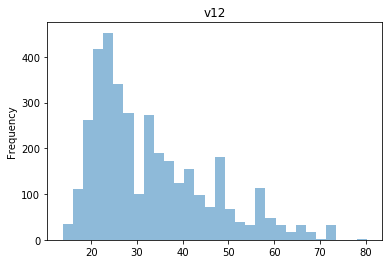

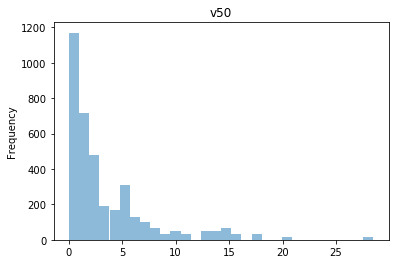

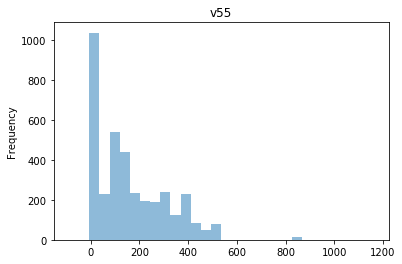

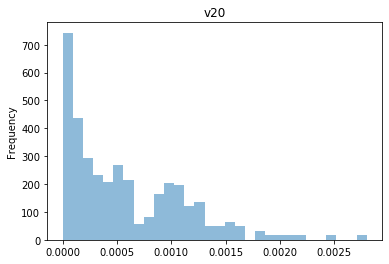

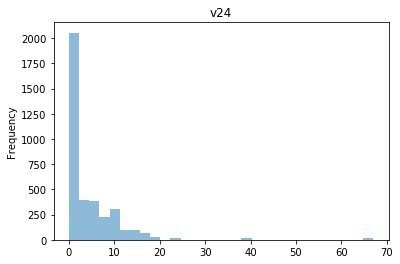

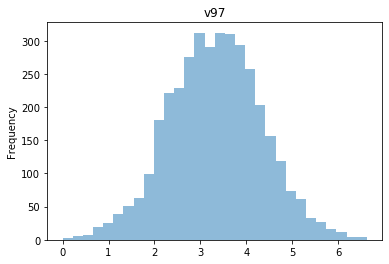

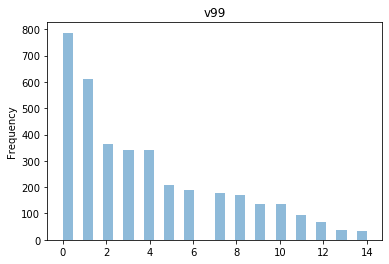

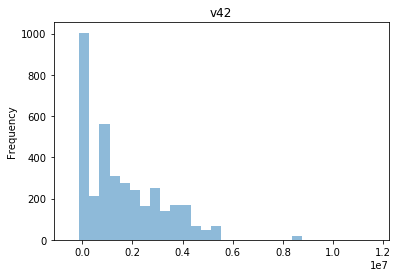

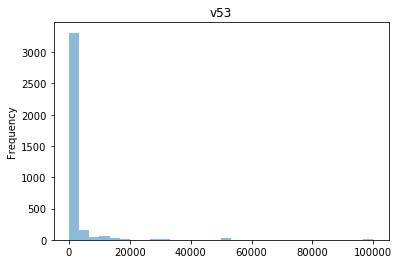

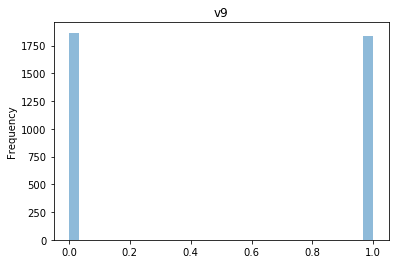

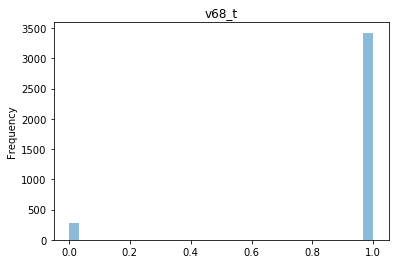

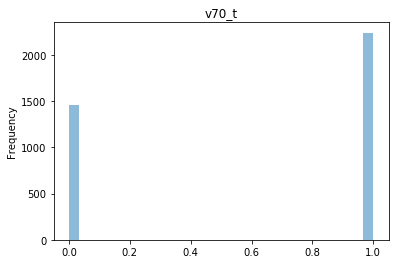

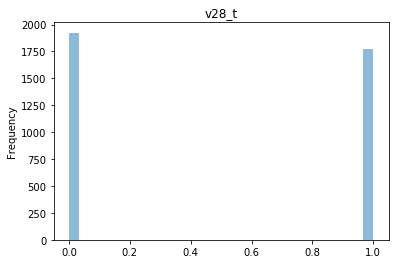

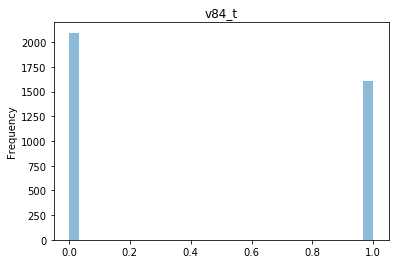

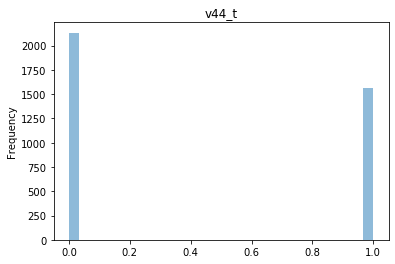

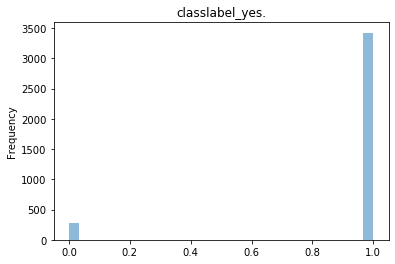

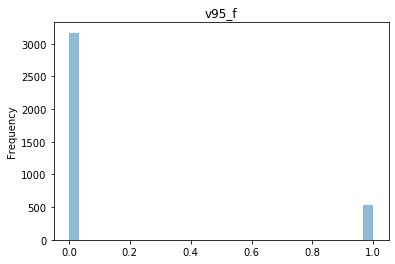

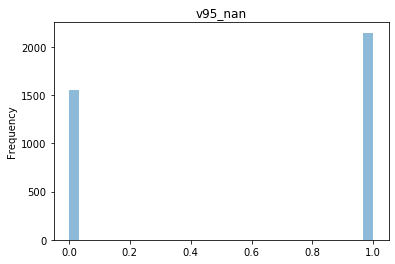

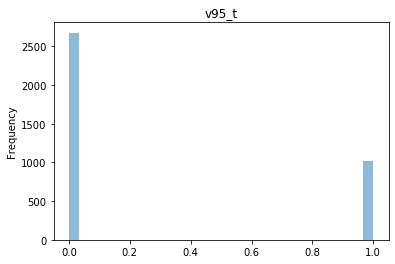

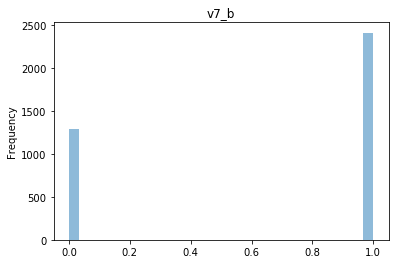

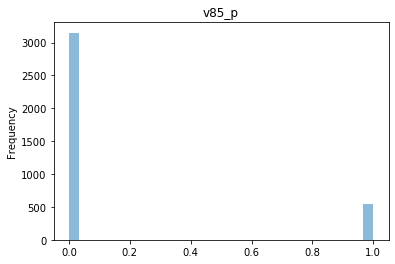

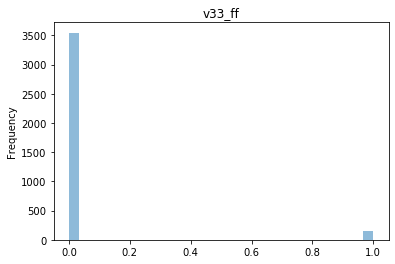

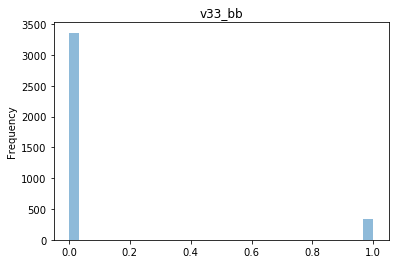

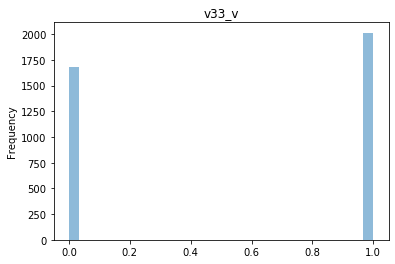

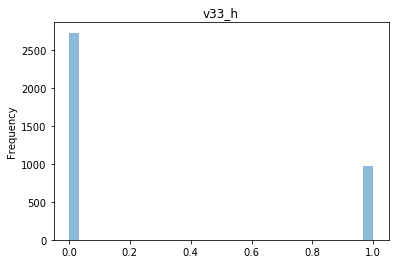

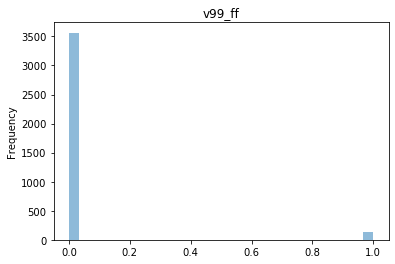

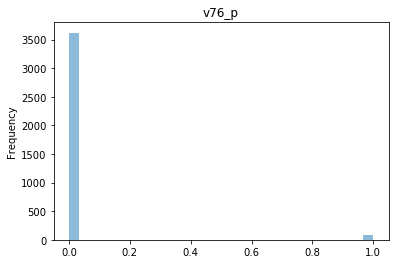

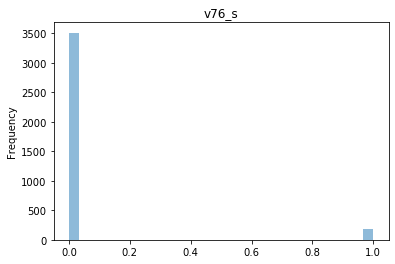

In [30]:
describe_data(training_data = df_train)

                                            Plots for v50                                             


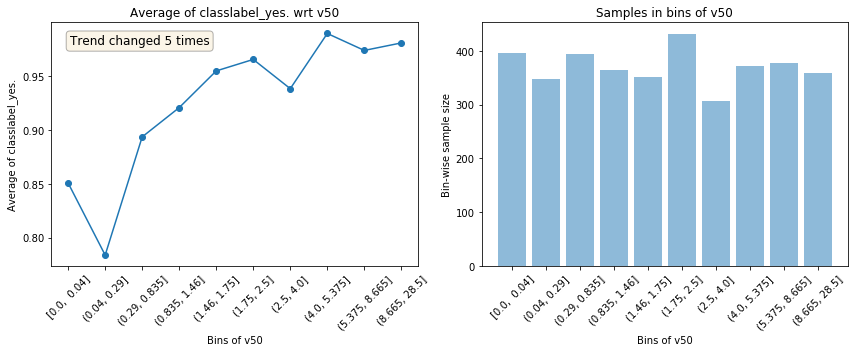

--------------------------------------------------------------------------------------------------------------


                                            Plots for v55                                             


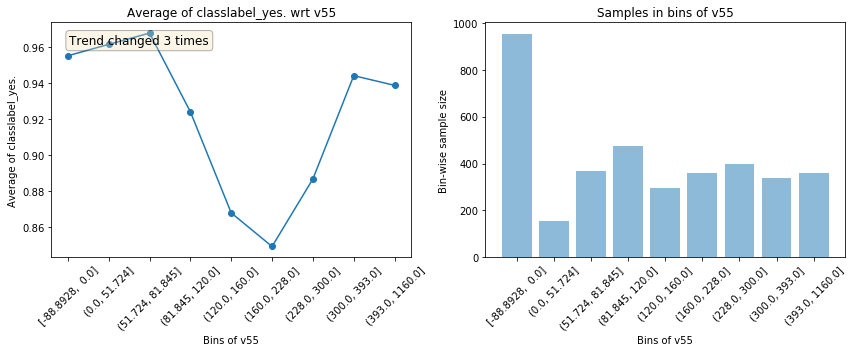

--------------------------------------------------------------------------------------------------------------


                                            Plots for v20                                             


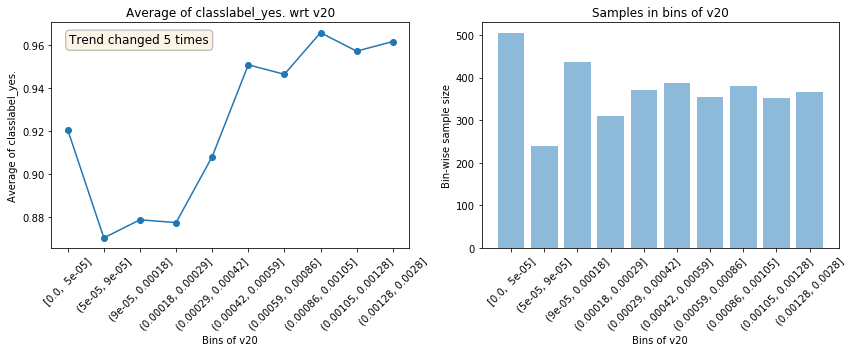

--------------------------------------------------------------------------------------------------------------


                                            Plots for v24                                             


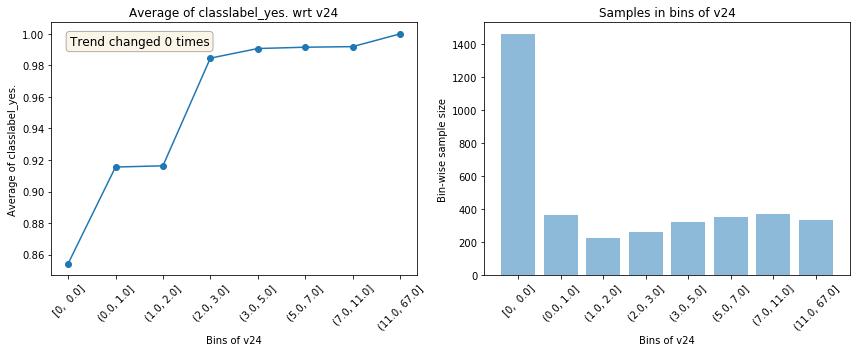

--------------------------------------------------------------------------------------------------------------


                                            Plots for v42                                             


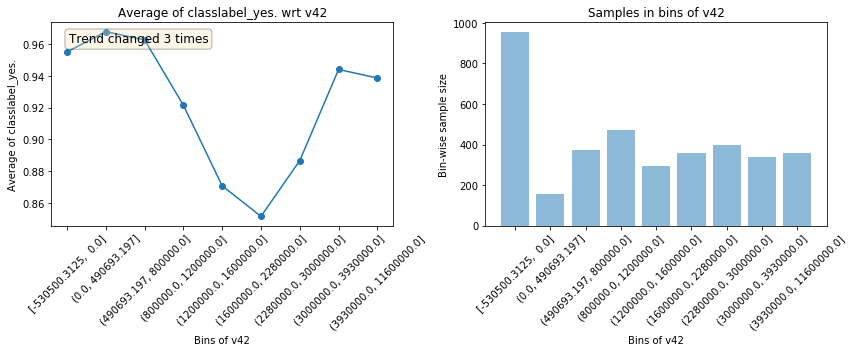

--------------------------------------------------------------------------------------------------------------


                                            Plots for v53                                             


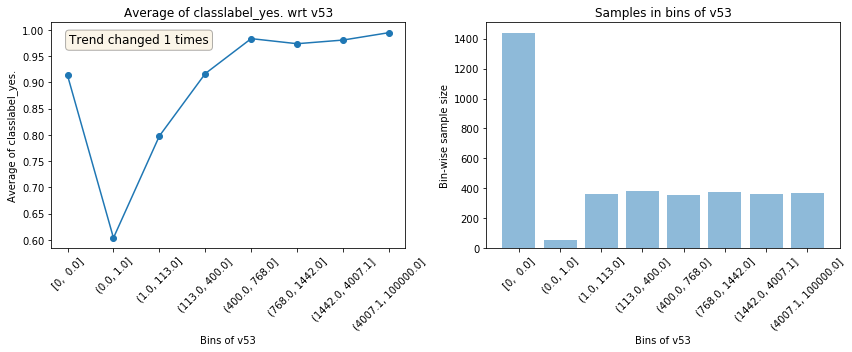

--------------------------------------------------------------------------------------------------------------


                                            Plots for v12                                             


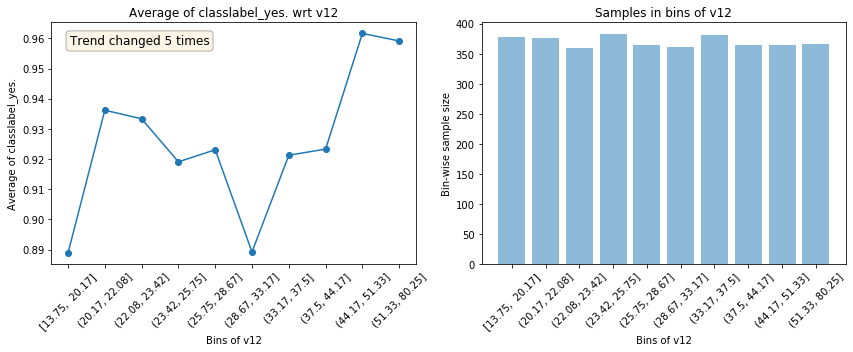

--------------------------------------------------------------------------------------------------------------


                                            Plots for v97                                             


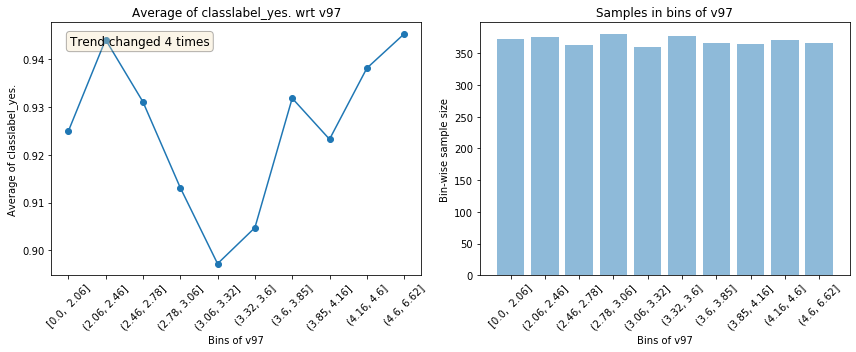

--------------------------------------------------------------------------------------------------------------


                                            Plots for v99                                             


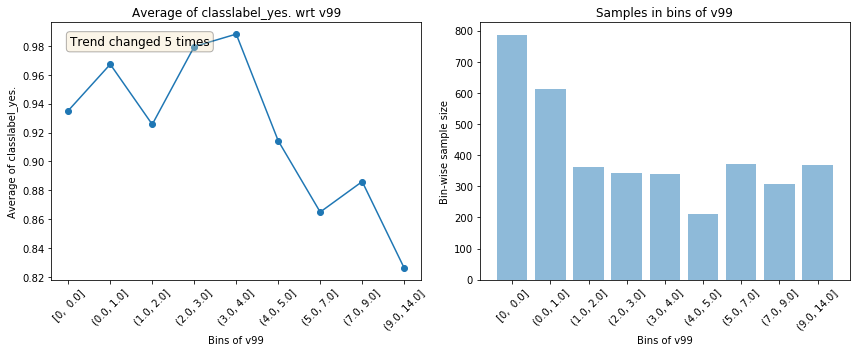

--------------------------------------------------------------------------------------------------------------




In [31]:
from featexp import get_univariate_plots

# Kind of partial dependence plot but for categorical data.
# It will help us visualize the relation of the intervals of the 
# variables with the labels and therefore make better feat enineering
continuous_var = ['v50','v55','v20','v24','v42','v53','v12','v97','v99']
get_univariate_plots(data = df_train, target_col = target_class, features_list = continuous_var)

## Outliers

v50


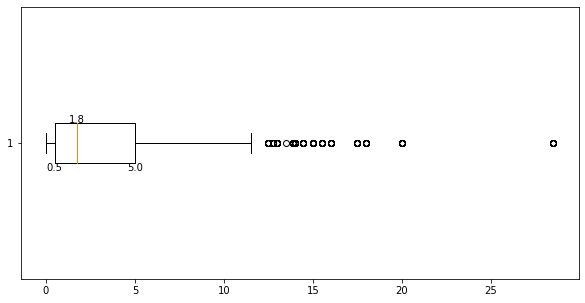

v55


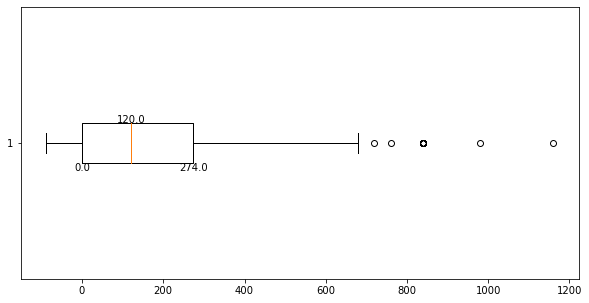

v20


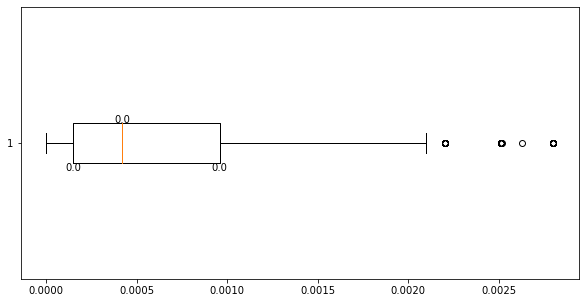

v24


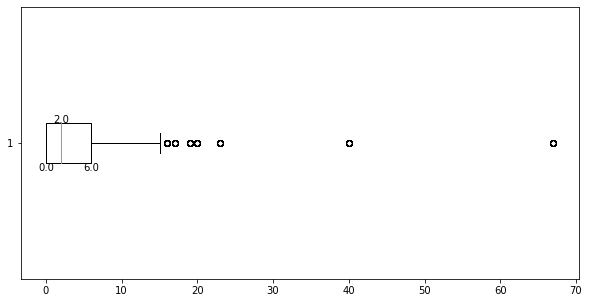

v42


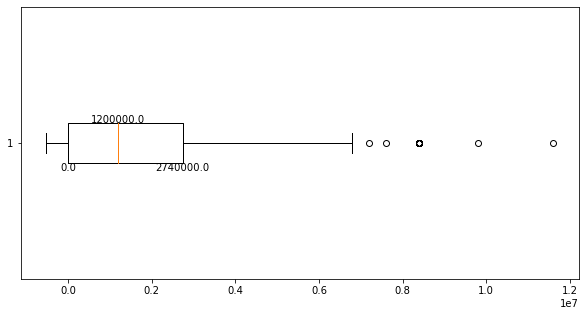

v53


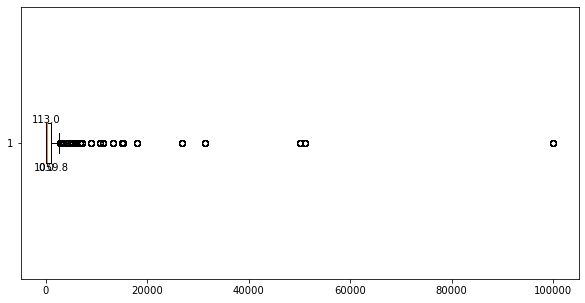

v12


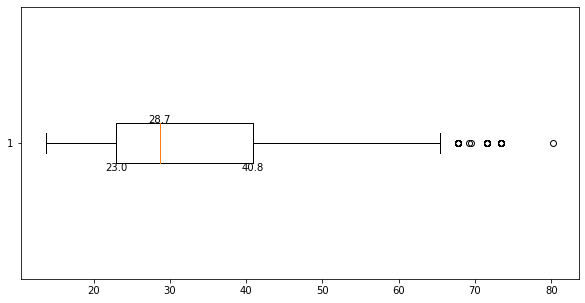

v97


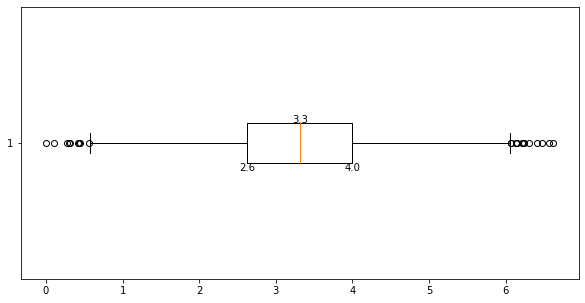

v99


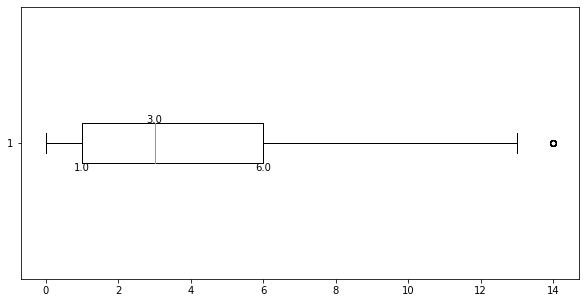

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

In [32]:
# Check box-plots for outliers
represent_boxplot(df_train = df_train, columns = continuous_var)

In [33]:
# Cap outliers, where the outliers don't give us additional information. We can check that in the partial dependence
# plot above by looking at how much it deviates from the mean of the labels.
# It will be done in: v50 (most 'yes')(12) (outliers represent the mean of the target variable)
# v24 (all outliers represent yes label)(16)
# v20 (most 'yes')(0.0015), v55 (the mean) (700), v42 (the mean)(6*10^6)
# In v53 (4000)

In [34]:
# Define values from which we will cap the features to avoid outliers

dict_features = {'v50':12,
                 'v24':16,
                 'v20':0.0015,
                 'v55':700,
                 'v42':6000000,
                 'v53':2000
                }

df_train = cap_outliers(df_train = df_train, dict_features = dict_features)

v50


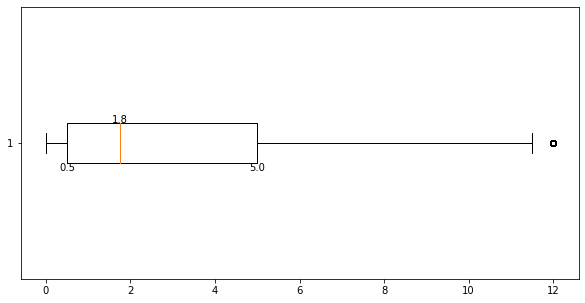

v55


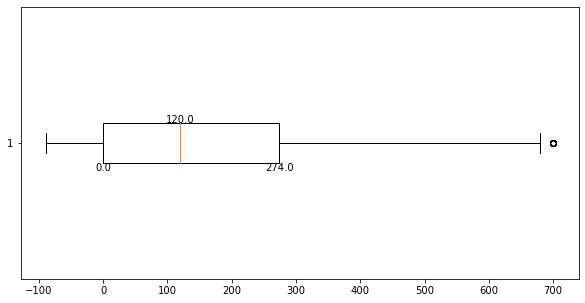

v20


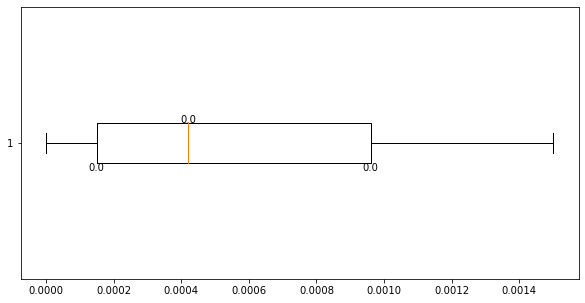

v24


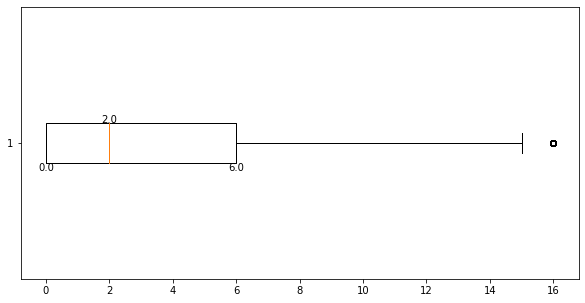

v42


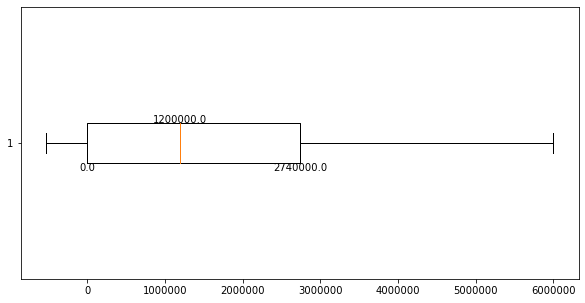

v53


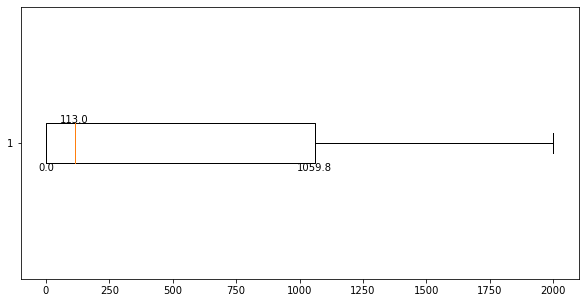

v12


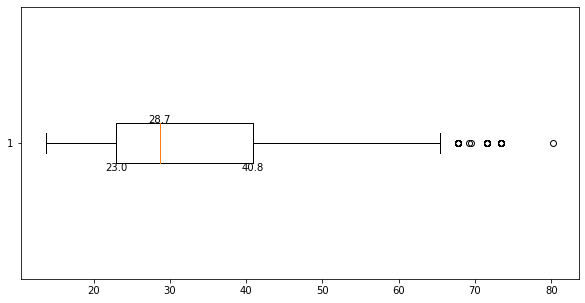

v97


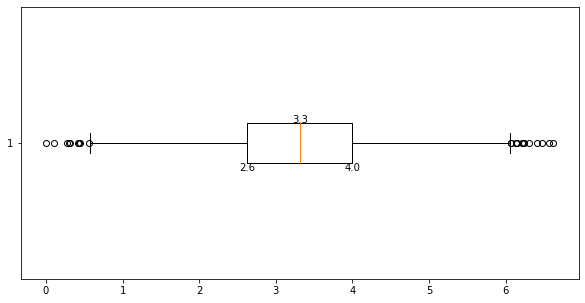

v99


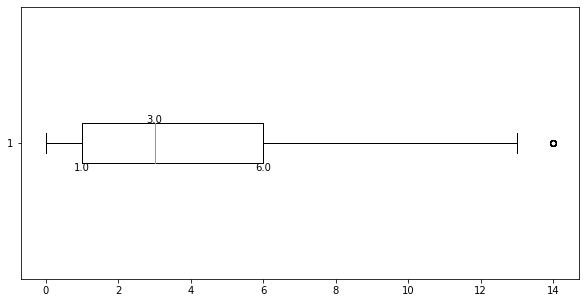

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

In [35]:
# Without outliers
represent_boxplot(df_train = df_train, columns = continuous_var)

### Standarize or normalize the data 

In [36]:
feat_trans = Feature_transform(df_train = df_train, columns = continuous_var)
feat_trans.min_max_fit()
df_new = feat_trans.min_max_transform(df = df_train)

#feat_trans = Feature_transform(df_train = df_train, columns = ['v50','v55','v20','v24','v42','v53'])
#feat_trans.standarize_fit()
#df_new_norm = feat_trans.standatize_transform(df = df_train)

In [37]:
df_new

,v12,v50,v55,v20,v24,v97,v99,v42,v53,v9,...,v95_t,v7_b,v85_p,v33_ff,v33_bb,v33_v,v33_h,v99_ff,v76_p,v76_s
0,0.062707,0.145833,0.214088,0.033333,0.0625,0.425982,0.000000,0.203736,0.0025,0,...,1,0,0,0,0,1,0,0,0,0
1,0.047669,0.024167,0.366200,0.020000,0.0000,0.521148,0.571429,0.387490,0.0000,1,...,0,1,1,0,0,1,0,0,0,1
2,0.263158,0.000000,0.234370,0.073333,0.0625,0.489426,0.714286,0.228237,0.0095,0,...,1,1,0,1,0,0,0,1,0,0
3,0.517594,0.027917,0.112680,0.086667,0.0000,0.635952,0.428571,0.081234,0.0600,1,...,0,0,0,0,0,0,0,0,0,0
4,0.279398,0.041667,0.406764,0.233333,0.0000,0.519637,0.571429,0.436490,0.0000,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,0.075188,0.225833,0.197968,0.500000,0.3125,0.623867,0.071429,0.201328,1.0000,0,...,1,0,0,0,0,1,0,0,0,0
3696,0.146617,0.708333,0.264792,0.600000,0.3125,0.468278,0.071429,0.264987,0.0000,0,...,1,0,0,0,0,1,0,0,0,0
3697,0.307068,0.375000,0.112680,0.613333,0.7500,0.425982,0.000000,0.081234,0.1105,0,...,0,1,0,0,0,1,0,0,0,0
3698,0.211729,0.312500,0.239440,0.100000,0.3125,0.747734,0.142857,0.234362,0.0015,1,...,0,1,0,0,0,1,0,0,0,0


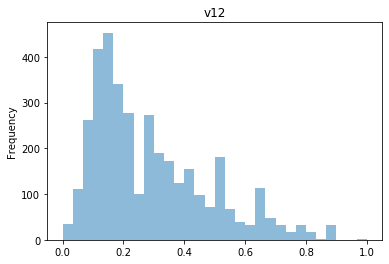

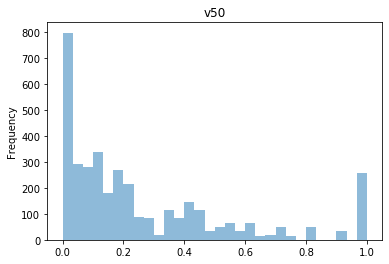

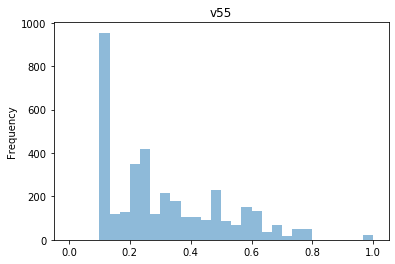

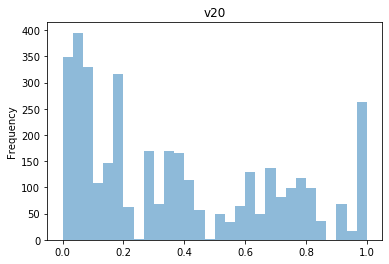

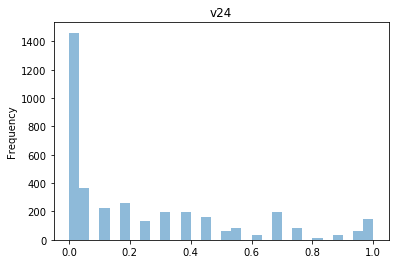

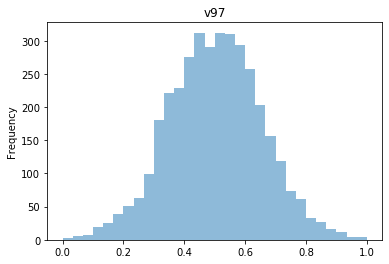

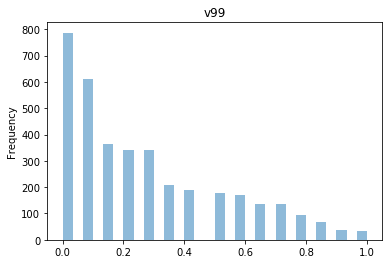

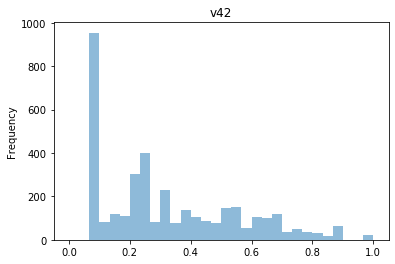

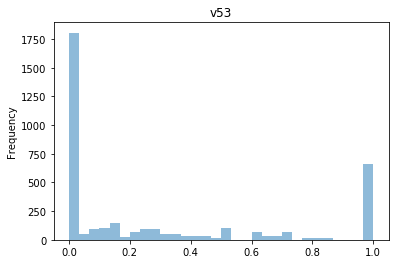

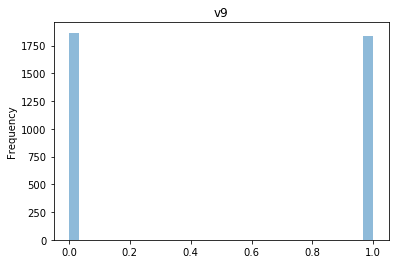

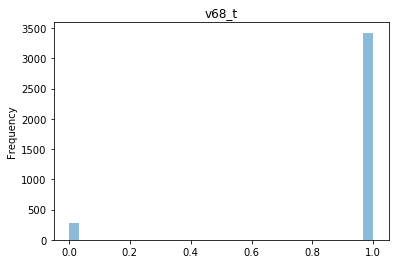

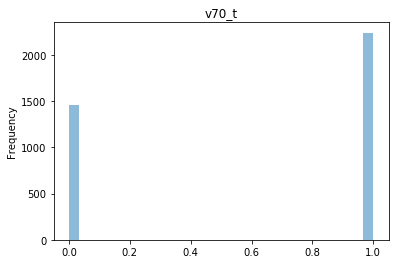

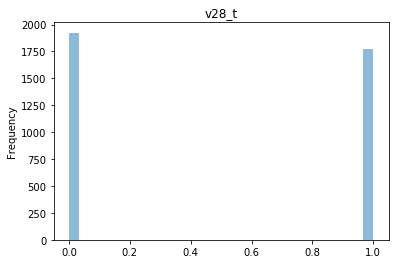

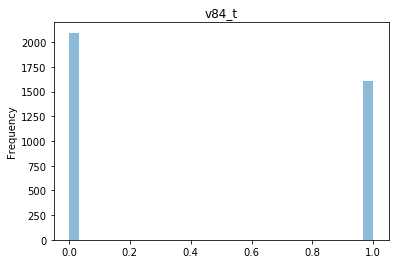

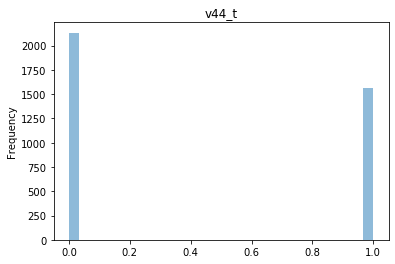

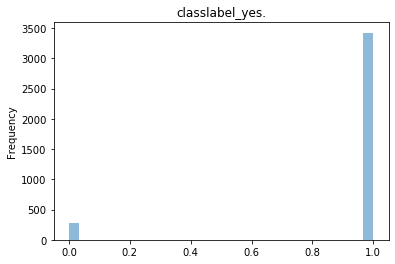

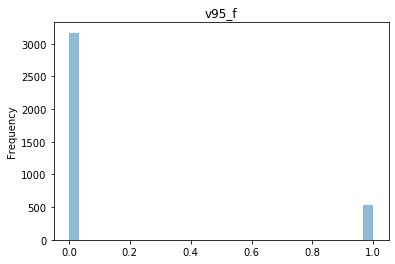

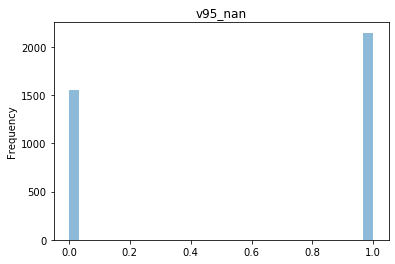

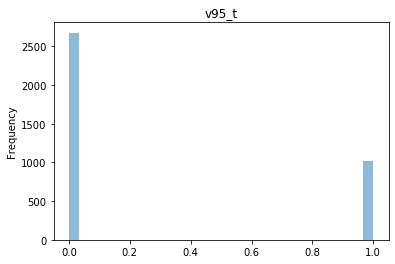

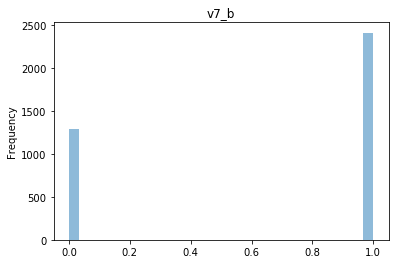

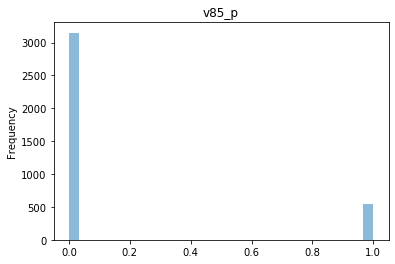

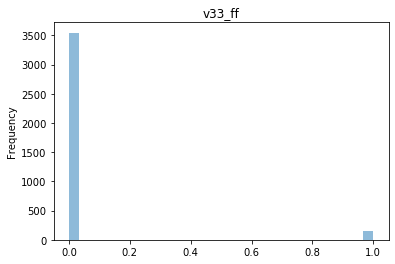

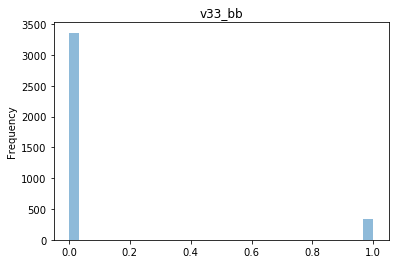

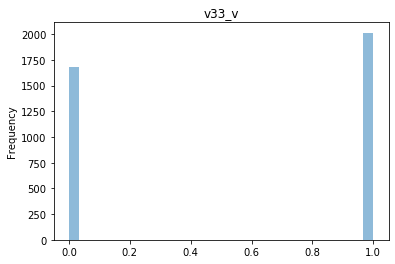

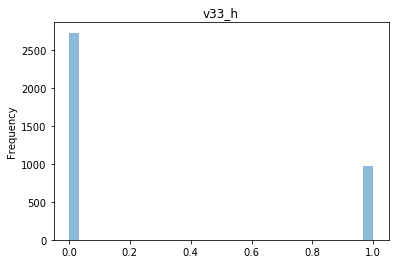

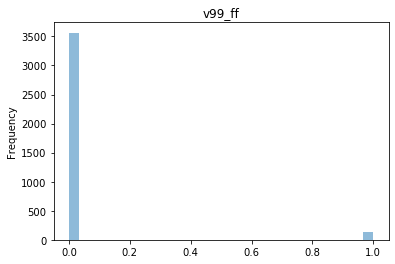

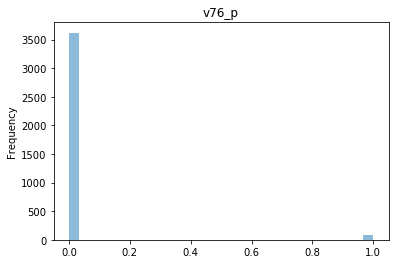

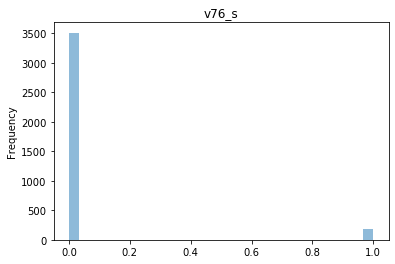

In [38]:
describe_data(training_data = df_new, num_bool = False)

In [39]:
df_new.shape

(3700, 28)

In [ ]:
df_new

In [40]:
df_new.to_csv('train_data_clean.csv')  